Saving veri.txt to veri (2).txt
orta doğu teknik üniversitesi (odtü) tarafından oluşturulan ve internet ortamından ulaşılabilecek bilim platformu “openmetu” erişime açıldı. artık üniversitede üretilen bilimsel bilgiye finansal, yasal ve teknik engeller olmaksızın “https://open.metu.edu.tr” adresinden ulaşılabilecek.

odtü kültür ve kongre merkezi’ndeki “açık bilim konferansı ve akademik arşiv açılışı” programında bir konuşma yapan odtü rektör yardımcısı prof. dr. mehmet zeyrek, openmetu uygulaması için biraz geç kaldıklarına, türkiye’de daha önce bu alanda girişimde bulunan üniversitelerin olduğuna işaret etti.

odtü’nün araştırmada ve eğitimde hep ön saflarda yer aldığını vurgulayan zeyrek, “topluma ve uluslararası camiaya karşı sorumluluklarımızı ön planda tutarak bu çalışmalara başladık. openmetu adını verdiğimiz platformla bütün çıktılarımıza açık olarak erişilecek. son derece yararlı olacak. bilimin paylaşılabilir olması çok önemli bir gelişim” diye konuştu.

i̇yi bir zamanlama ve

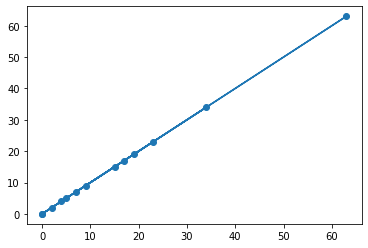

In [8]:
from google.colab import files
import string

yuklenenDosya = files.upload()

article = open("veri.txt", "rt")
readarticle = article.read()
readarticle = readarticle.lower()
article.close()
print(readarticle)


keywords = [
                    "bilgi",
                    "belge", 
                    "açık",
                    "erişim", 
                    "bilim", 
                    "büyük",
                    "veri", 
                    "semantik", 
                    "teknoloji", 
                    "makine",
                    "öğrenmesi", 
                    "yapay",
                    "zeka"
]
print(keywords)

for keyword in keywords:
  result = readarticle.count(keyword)
  print(keyword+": " + str(result))

  print("✔ Hesaplama İşlemi Tarih")
import datetime

Tarih = datetime.datetime.now()

print(Tarih)


keywords=[ 17,0,34,19,15,7,63,0,9,23,2,5,4]
toplam=0
ortalama=0
print("✔Toplam İlişkili Anahtar Kelime Sayısı")
for i in range(0,len(keywords)):
      toplam+=keywords[i]
 
ortalama=toplam/len(keywords)

#Toplam İlişkili Anahtar Kelime Sayısı   
print('Toplam  : ',toplam)
#Toplam İlişkili Anahtar Kelime ortalaması
print("✔Anahtar  Kelimelerin  ortalaması")
print('Ortalama : ',ortalama)
#Toplam İlişkili Anahtar Kelime yüzdesi
print("✔Anahtar Kelime İlişkisinin Yüzdesi")
print('Yüzde : ',toplam*ortalama/100)

if toplam*ortalama/100 > 25:
  print("✔Paragrafla Anahtar Kelimelerin Bir İlişkisi vardır")

else:
  print("✔Paragrafla Anahtar Kelimelerin Bir İlişkisi yoktur.")

print("✔ Paragrafla Anahtar Kelimelerin Bir İlişkisi olup olmadığını gösteren grafik")




import matplotlib.pyplot as plt
from scipy import stats

x = [ 17,0,34,19,15,7,63,0,9,23,2,5,4]
y = [ 17,0,34,19,15,7,63,0,9,23,2,5,4]


for i in range(0,len(x)):
      toplam+=x[i]
 
ortalama=toplam/len(x)



slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x,y)
plt.plot(x, mymodel)
plt.show()



